<a href="https://colab.research.google.com/github/aninbangkit/ML_Sehat-Mentalku/blob/main/Sehat_Mentalku_Draft_(Blm_Pakai_Data_Set).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


In [2]:
from google.colab import files
uploaded = files.upload()

Saving keys - Sheet1.csv to keys - Sheet1.csv


In [3]:
log = pd.read_csv("keys - Sheet1.csv")


In [4]:
consumerKey = log["key"][0]
consumerSecret = log["key"][1]
accessToken = log["key"][2]
accessTokenSecret = log["key"][3]

In [5]:
authenticate = tweepy.OAuthHandler(consumerKey, consumerSecret) 
authenticate.set_access_token(accessToken, accessTokenSecret) 
api = tweepy.API(authenticate, wait_on_rate_limit = True)

In [6]:
posts = api.user_timeline(screen_name="tim_cook", count = 100, lang ="en", tweet_mode="extended")


In [25]:
print("5 Tweet teratas:\n")
i=1
for tweet in posts[:5]:
    print(str(i) +') '+ tweet.full_text + '\n')
    i= i+1


5 Tweet teratas:

1) Among this year’s WWDC Swift Student Challenge winners are some exceptional young women who are using the power of code to solve problems in their communities, and passing on their superpowers to the next generation. https://t.co/vBX8YZMm3W

2) Today we remember and honor the brave women and men, and the families they left behind, who made the ultimate sacrifice to protect this nation. To simply say we are thankful will never be enough — we are forever indebted to you. #MemorialDay

3) Roma, ci siamo! Apple Via del Corso pays homage to Rome's rich history of culture and art. We’re so thankful our customers can experience this breathtaking new store in one of Rome’s most vibrant areas! https://t.co/H6iWCgPpce

4) 20 years ago today, we opened our first Apple retail stores. Each time I visit one of our stores around the world, I feel the special energy of our teams, the creativity of our customers and how our products empower them to change the world. Here’s to the n

In [8]:
df = pd.DataFrame([tweet.full_text for tweet in posts], columns=['Tweets'])
df.head()

,Tweets
0,Among this year’s WWDC Swift Student Challenge...
1,Today we remember and honor the brave women an...
2,"Roma, ci siamo! Apple Via del Corso pays homag..."
3,"20 years ago today, we opened our first Apple ..."
4,We believe everyone should have the tools they...


In [11]:
def cleanTxt(text):
 text = re.sub('@[A-Za-z0–9]+', '', text) 
 text = re.sub('#', '', text) 
 text = re.sub('RT[\s]+', '', text) 
 text = re.sub('https?:\/\/\S+', '', text) 
 text = re.sub('!', '', text) 

 
 return text

df['Tweets'] = df['Tweets'].apply(cleanTxt)

df.head()

,Tweets
0,Among this year’s WWDC Swift Student Challenge...
1,Today we remember and honor the brave women an...
2,"Roma, ci siamo Apple Via del Corso pays homage..."
3,"20 years ago today, we opened our first Apple ..."
4,We believe everyone should have the tools they...


In [12]:
def getSubjectivity(text):
   return TextBlob(text).sentiment.subjectivity

In [13]:
def getPolarity(text):
   return  TextBlob(text).sentiment.polarity

In [14]:
df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)

In [15]:
df

,Tweets,Subjectivity,Polarity
0,Among this year’s WWDC Swift Student Challenge...,0.466667,0.255556
1,Today we remember and honor the brave women an...,0.592857,0.066667
2,"Roma, ci siamo Apple Via del Corso pays homage...",0.607576,0.435606
3,"20 years ago today, we opened our first Apple ...",0.301587,0.202381
4,We believe everyone should have the tools they...,0.495130,0.211039
...,...,...,...
95,Thank you and On the 10th anniversary of the...,0.750000,0.700000
96,We created the Health app because we believe e...,0.711667,0.526667
97,“A great soul never dies. It brings us togethe...,0.750000,0.800000
98,"As Grace Hopper said, “The most dangerous phra...",0.800000,-0.033333


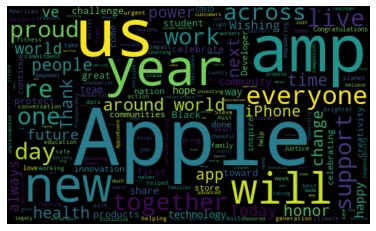

In [16]:
allWords = ' '.join([twts for twts in df['Tweets']])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(allWords)

plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [17]:
def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'
df['Analysis'] = df['Polarity'].apply(getAnalysis)
# Show the dataframe
df

,Tweets,Subjectivity,Polarity,Analysis
0,Among this year’s WWDC Swift Student Challenge...,0.466667,0.255556,Positive
1,Today we remember and honor the brave women an...,0.592857,0.066667,Positive
2,"Roma, ci siamo Apple Via del Corso pays homage...",0.607576,0.435606,Positive
3,"20 years ago today, we opened our first Apple ...",0.301587,0.202381,Positive
4,We believe everyone should have the tools they...,0.495130,0.211039,Positive
...,...,...,...,...
95,Thank you and On the 10th anniversary of the...,0.750000,0.700000,Positive
96,We created the Health app because we believe e...,0.711667,0.526667,Positive
97,“A great soul never dies. It brings us togethe...,0.750000,0.800000,Positive
98,"As Grace Hopper said, “The most dangerous phra...",0.800000,-0.033333,Negative


In [26]:
print('Tweet Positif:\n')
j=1
sortedDF = df.sort_values(by=['Polarity']) #Sort the tweets
for i in range(0, sortedDF.shape[0] ):
  if( sortedDF['Analysis'][i] == 'Positive'):
    print(str(j) + ') '+ sortedDF['Tweets'][i])
    print()
    j= j+1

Tweet Positif:

1) Among this year’s WWDC Swift Student Challenge winners are some exceptional young women who are using the power of code to solve problems in their communities, and passing on their superpowers to the next generation. 

2) Today we remember and honor the brave women and men, and the families they left behind, who made the ultimate sacrifice to protect this nation. To simply say we are thankful will never be enough — we are forever indebted to you. MemorialDay

3) Roma, ci siamo Apple Via del Corso pays homage to Rome's rich history of culture and art. We’re so thankful our customers can experience this breathtaking new store in one of Rome’s most vibrant areas 

4) 20 years ago today, we opened our first Apple retail stores. Each time I visit one of our stores around the world, I feel the special energy of our teams, the creativity of our customers and how our products empower them to change the world. Here’s to the next 20 years 

5) We believe everyone should have t

In [27]:
print('Tweet Negatif:\n')
j=1
sortedDF = df.sort_values(by=['Polarity'],ascending=False) #Sort the tweets
for i in range(0, sortedDF.shape[0] ):
  if( sortedDF['Analysis'][i] == 'Negative'):
    print(str(j) + ') '+sortedDF['Tweets'][i])
    print()
    j=j+1

Tweet Negatif:

1) Black, Brown and transgender activists have always been at the heart of the LGBTQ+ movement. The new Apple Watch Pride Edition Braided Solo Loop honors their legacy and reaffirms Apple's commitment to support the ongoing work toward equality. 

2) Amid a devastating rise of COVID cases in India, our thoughts are with the medical workers, our Apple family and everyone there who is fighting through this awful stage of the pandemic. Apple will be donating to support and relief efforts on the ground.

3) Today’s verdict was just, but as Dr. King wrote: “Justice for Black people will not flow into society merely from court decisions nor from fountains of political oratory...Justice for Black people cannot be achieved without radical changes in the structure of our society.”

4) The horrific violence against the Asian community, as evidenced by Tuesday’s murders in Georgia, calls us all to speak up and take action. We grieve for those lost and stand firmly with our Asian f

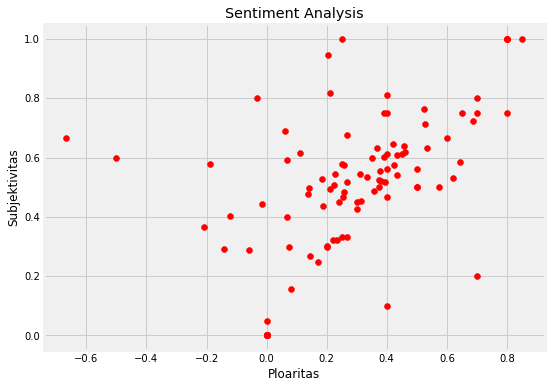

In [20]:
plt.figure(figsize=(8,6)) 
for i in range(0, df.shape[0]):
  plt.scatter(df["Polarity"][i], df["Subjectivity"][i], color='Red') 

plt.title('Sentiment Analysis') 
plt.xlabel('Ploaritas') 
plt.ylabel('Subjektivitas') 
plt.show()

In [21]:
ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['Tweets']
ptweets

round( (ptweets.shape[0] / df.shape[0]) * 100 , 1)

80.0

In [22]:
ntweets = df[df.Analysis == 'Negative']
ntweets = ntweets['Tweets']
ntweets

round( (ntweets.shape[0] / df.shape[0]) * 100, 1)

9.0

In [23]:
df['Analysis'].value_counts()

Positive    80
Neutral     11
Negative     9
Name: Analysis, dtype: int64

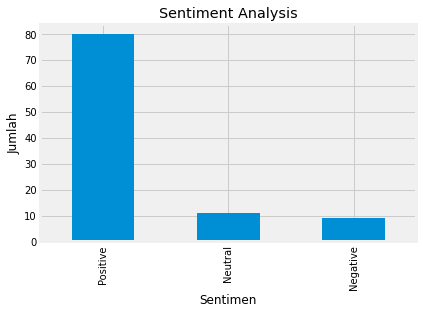

In [24]:
plt.title('Sentiment Analysis')
plt.xlabel('Sentimen')
plt.ylabel('Jumlah')
df['Analysis'].value_counts().plot(kind = 'bar')
plt.show()
